In [ ]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 7.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633975 sha256=f2087720f381c8353459f7b4cc3e5de9b70bf18924d50931c6ad1cbab8875bdc
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import surprise
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise import KNNBasic

In [ ]:
df = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [ ]:
df.describe()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

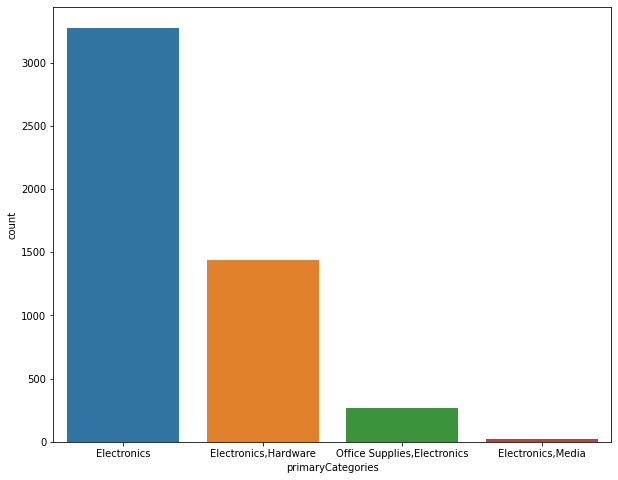

In [ ]:
primary_cat = df['primaryCategories'].value_counts()
primary_cat

dims = (10, 8)
fig, ax = plt.subplots(figsize = dims)
ax = sns.countplot(x=df.primaryCategories)

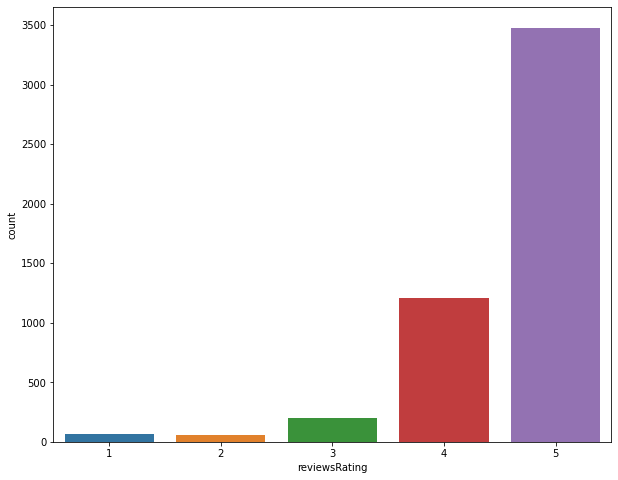

In [ ]:
df.rename(columns={"reviews.rating":"reviewsRating"},inplace=True)
rev_df = df['reviewsRating'].value_counts()
rev_df

dims = (10, 8)
fig, ax = plt.subplots(figsize = dims)
ax = sns.countplot(x="reviewsRating", data=df)

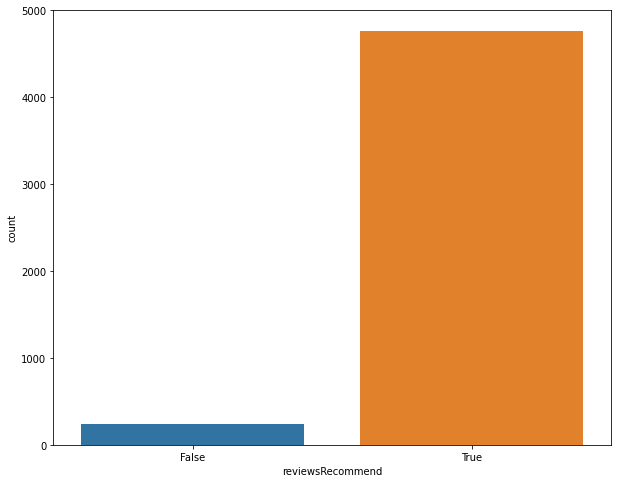

In [ ]:
df.rename(columns={"reviews.doRecommend":"reviewsRecommend"}, inplace=True)
rev_rec = df['reviewsRecommend'].value_counts()
rev_rec

dims = (10, 8)
fig, ax = plt.subplots(figsize = dims)
ax = sns.countplot(x="reviewsRecommend", data=df)

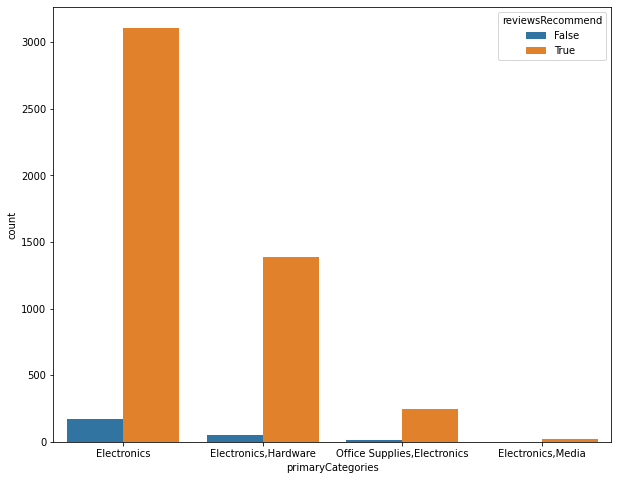

In [ ]:
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x="primaryCategories",hue="reviewsRecommend", data=df)

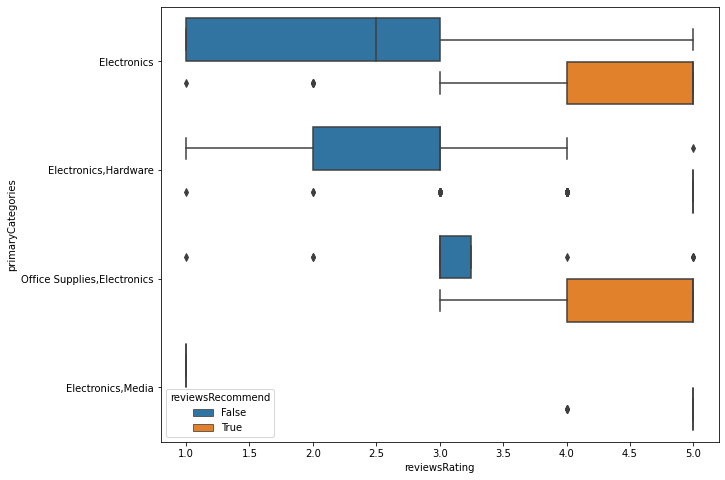

In [ ]:
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.boxplot(x="reviewsRating", y="primaryCategories", hue="reviewsRecommend", data=df)

In [ ]:
df.isnull().sum()

id                       0
dateAdded                0
dateUpdated              0
name                     0
asins                    0
brand                    0
categories               0
primaryCategories        0
imageURLs                0
keys                     0
manufacturer             0
manufacturerNumber       0
reviews.date             0
reviews.dateAdded     3948
reviews.dateSeen         0
reviewsRecommend         0
reviews.id            4971
reviews.numHelpful       0
reviewsRating            0
reviews.sourceURLs       0
reviews.text             0
reviews.title           13
reviews.username         0
sourceURLs               0
dtype: int64

In [ ]:
df[['reviews.username','id','reviewsRating']]

,reviews.username,id,reviewsRating
0,llyyue,AVqVGZNvQMlgsOJE6eUY,3
1,Charmi,AVqVGZNvQMlgsOJE6eUY,5
2,johnnyjojojo,AVqVGZNvQMlgsOJE6eUY,4
3,Kdperry,AVqVGZNvQMlgsOJE6eUY,5
4,Johnnyblack,AVqVGZNvQMlgsOJE6eUY,5
...,...,...,...
4995,litle,AVqkIdZiv8e3D1O-leaJ,5
4996,gracie,AVqkIdZiv8e3D1O-leaJ,5
4997,Hawk,AVqkIdZiv8e3D1O-leaJ,4
4998,Mrbilly,AVqkIdZiv8e3D1O-leaJ,5


In [ ]:
reader = Reader()
data = Dataset.load_from_df(df[['reviews.username', 'id', 'reviewsRating']], reader)
# data = Dataset.load_from_df(rating[['reviews.username','id','reviewsRating']], reader)
trainset, testset = train_test_split(data, test_size = 0.20, random_state=50)

In [ ]:
algo_svd = SVD()
prediction_mf = algo_svd.fit(trainset).test(testset)
prediction_mf

[Prediction(uid='boste03', iid='AVqkIhwDv8e3D1O-lebb', r_ui=5.0, est=4.578838960749388, details={'was_impossible': False}),
 Prediction(uid='Kevinandkalii', iid='AVqkIj9snnc1JgDc3khU', r_ui=5.0, est=4.444249621814829, details={'was_impossible': False}),
 Prediction(uid='PT53226', iid='AWFUWc8THh53nbDRF6YO', r_ui=4.0, est=4.658149733118285, details={'was_impossible': False}),
 Prediction(uid='kimb', iid='AVpgdkC8ilAPnD_xsvyi', r_ui=5.0, est=4.508044431212938, details={'was_impossible': False}),
 Prediction(uid='Colleen', iid='AVph0EeEilAPnD_x9myq', r_ui=5.0, est=4.637242780700107, details={'was_impossible': False}),
 Prediction(uid='Lintor', iid='AWFUWc8THh53nbDRF6YO', r_ui=5.0, est=4.658149733118285, details={'was_impossible': False}),
 Prediction(uid='Jays', iid='AVpgdkC8ilAPnD_xsvyi', r_ui=5.0, est=4.466300269780478, details={'was_impossible': False}),
 Prediction(uid='Squirl', iid='AWK8z0pOIwln0LfXlSxH', r_ui=5.0, est=4.758207749084025, details={'was_impossible': False}),
 Predictio

In [ ]:
recom_svd = algo_svd.predict(uid='Jays',iid='AWMjT0WguC1rwyj_rFh3')
recom_svd

Prediction(uid='Jays', iid='AWMjT0WguC1rwyj_rFh3', r_ui=None, est=4.765074570600568, details={'was_impossible': False})

In [ ]:
sim_options = {'name': 'pearson_baseline', 'shrinkage': 0}
algo = KNNBasic(sim_options=sim_options)
algo_knn = KNNBasic(k = 50, sim_options=sim_options)
prediction_knn = algo_knn.fit(trainset).test(testset)
prediction_knn

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


[Prediction(uid='boste03', iid='AVqkIhwDv8e3D1O-lebb', r_ui=5.0, est=4.60925, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Kevinandkalii', iid='AVqkIj9snnc1JgDc3khU', r_ui=5.0, est=5, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='PT53226', iid='AWFUWc8THh53nbDRF6YO', r_ui=4.0, est=4.60925, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='kimb', iid='AVpgdkC8ilAPnD_xsvyi', r_ui=5.0, est=4.946977157104646, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid='Colleen', iid='AVph0EeEilAPnD_x9myq', r_ui=5.0, est=4.60925, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Lintor', iid='AWFUWc8THh53nbDRF6YO', r_ui=5.0, est=4.60925, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Jays', iid='AVpgdkC8ilAPnD_xsvyi', r_ui=5.0, est=4.60925, details={'was_impossible': True, 'reason'

In [ ]:
recom_knn = algo_knn.predict(uid='Jays',iid='AWMjT0WguC1rwyj_rFh3')
recom_knn

Prediction(uid='Jays', iid='AWMjT0WguC1rwyj_rFh3', r_ui=None, est=4.60925, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
accuracy.mae(prediction_mf)
accuracy.fcp(prediction_mf)
accuracy.rmse(prediction_mf)

MAE:  0.5703
FCP:  0.5405
RMSE: 0.7944


0.7944024153482033

In [ ]:
accuracy.mae(prediction_knn)
accuracy.fcp(prediction_knn)
accuracy.rmse(prediction_knn)

MAE:  0.5753
FCP:  0.5641
RMSE: 0.8257


0.8256951342315226